In [58]:
import matplotlib.pyplot as plt

def Polt3D(data):
    ax = plt.subplot(projection = '3d')  
    ax.scatter(data[:,0],data[:,1],data[:,2], c = 'r')   
    
    plt.show()

In [59]:
from solver import *
from armatures import *
from models import *
import numpy as np
import config


np.random.seed(20160923)
pose_glb = np.zeros([1, 3]) # global rotation


########################## smpl settings ##########################
# note that in smpl and smpl-h no pca for pose is provided
# therefore in the model we fake an identity matrix as the pca coefficients
# to make the code compatible

n_pose = 23 * 3 # degrees of freedom, (n_joints - 1) * 3
n_shape = 10
pose_pca = np.random.uniform(-0.2, 0.2, size=n_pose)
shape = np.random.normal(size=n_shape)
mesh = KinematicModel(config.SMPL_MODEL_PATH, SMPLArmature, scale=10)


########################## solving example ############################

wrapper = KinematicPCAWrapper(mesh, n_pose=n_pose)
solver = Solver(verbose=True)

_, keypoints = \
  mesh.set_params(pose_pca=pose_pca, pose_glb=pose_glb, shape=shape)

print('----------------------------------------------------------------------')
print('print keypoints')
print(keypoints)
print('print J_regressor_ext')
print(mesh.J_regressor_ext.shape)
print('print keypoints_ext')
print(mesh.armature.keypoints_ext)

params_est = solver.solve(wrapper, keypoints)

shape_est, pose_pca_est, pose_glb_est = wrapper.decode(params_est)

print('----------------------------------------------------------------------')
print('ground truth parameters')
print('pose pca coefficients:', pose_pca)
print('pose global rotation:', pose_glb)
print('shape: pca coefficients:', shape)

print('----------------------------------------------------------------------')
print('estimated parameters')
print('pose pca coefficients:', pose_pca_est)
print('pose global rotation:', pose_glb_est)
print('shape: pca coefficients:', shape_est)

mesh.set_params(pose_pca=pose_pca)
mesh.save_obj('./gt.obj')
mesh.set_params(pose_pca=pose_pca_est)
mesh.save_obj('./est.obj')

print('ground truth and estimated meshes are saved into gt.obj and est.obj')


----------------------------------------------------------------------
print keypoints
[[-3.92632874e-03 -2.16430786e+00  2.44914495e-01]
 [ 6.99819013e-01 -3.04340018e+00  1.54002080e-01]
 [-6.84639193e-01 -3.03077716e+00  1.78870289e-01]
 [-2.90823278e-02 -1.15961132e+00  4.93756261e-02]
 [ 9.14933152e-01 -6.44349485e+00  4.03805790e-01]
 [-1.49005771e+00 -6.41340778e+00  5.56533179e-01]
 [-1.21825912e-01  1.44245609e-01  3.39595561e-02]
 [ 1.19986248e+00 -9.96487265e+00  6.14682592e-01]
 [-2.28516887e+00 -9.85005527e+00  9.38493355e-01]
 [-1.33189026e-01  6.46447942e-01  2.97840556e-01]
 [ 1.73392717e+00 -1.03166100e+01  1.65038904e+00]
 [-2.35635579e+00 -1.01820358e+01  2.10740948e+00]
 [-7.49226306e-02  2.63849620e+00 -2.94573274e-01]
 [ 6.62823116e-01  1.77866256e+00 -1.07664718e-02]
 [-8.44332269e-01  1.73262767e+00 -2.79071952e-01]
 [-7.98535929e-02  3.22233054e+00  2.74464650e-01]
 [ 1.49962133e+00  2.13014702e+00  2.81233039e-02]
 [-1.70920308e+00  1.87671559e+00 -6.75457350e

In [60]:
from solver import *
from armatures import *
from models import *
import numpy as np
import config

def EstSMPLByKeypointAndScale(keypoints, scale):

    np.random.seed(20160923)

    pose_glb = np.zeros([1, 3]) # global rotation


    ########################## smpl settings ##########################
    # note that in smpl and smpl-h no pca for pose is provided
    # therefore in the model we fake an identity matrix as the pca coefficients
    # to make the code compatible

    n_pose = 23 * 3 # degrees of freedom, (n_joints - 1) * 3
    n_shape = 10
    pose_pca = np.random.uniform(-0.2, 0.2, size=n_pose)
    shape = np.random.normal(size=n_shape)
    mesh = KinematicModel(config.SMPL_MODEL_PATH, SMPLArmature, scale=scale)


    ########################## solving example ############################

    wrapper = KinematicPCAWrapper(mesh, n_pose=n_pose)
    solver = Solver(verbose=True)

    
    # 求解参数
    params_est = solver.solve(wrapper, keypoints)


    shape_est, pose_pca_est, pose_glb_est = wrapper.decode(params_est)


    print('----------------------------------------------------------------------')
    print('estimated parameters')
    print('pose pca coefficients:', pose_pca_est)
    print('pose global rotation:', pose_glb_est)
    print('shape: pca coefficients:', shape_est)

    mesh.set_params(pose_pca=pose_pca_est)
    mesh.save_obj('./est.obj')

    print('estimated meshes is saved into est.obj')


In [61]:
import numpy as np

def GetValueInListByIndex(IndexName,Index,InputList):
    for Item in InputList:
        if Index == Item[IndexName]:
            return Item
    return None

def GetKeyPointsByJointsDataInorder(joints_data):
    if len(joints_data) < 28:
        print("Input Error, Need At Least 28 Joints To Get KeyPoints")


    keypoints =  np.zeros((29, 3))

    pos_x = "position_x"
    pos_y = "position_y"
    pos_z = "position_z"

    cnt = 0
    for joint in joints_data:
        keypoints[cnt] = np.array((joint[pos_x], joint[pos_y], joint[pos_z]))
        cnt += 1
    
    if cnt == 28:
        print("Compute Head Top Manually")

        # 使用 Neck+4*(Head-Neck) 计算头顶大致位置

        print("Neck Position:")
        neck_data = joints_data[12]
        neck_vec = np.array((neck_data[pos_x], neck_data[pos_y], neck_data[pos_z]))
        print(neck_vec)

        print("Head Position:")
        head_data = joints_data[15]
        head_vec = np.array((head_data[pos_x], head_data[pos_y], head_data[pos_z]))
        print(head_vec)

        print("Est Head Top Position:")
        head_top_vec = 4 * (head_vec - neck_vec) + neck_vec
        print(head_top_vec)

        keypoints[cnt] = head_top_vec

    return keypoints

def GetJointsDataFromFrameData(frame_data, joint_names):
    joints_data = []

    for joint_data in frame_data["joint_position"]:
        if joint_data["joint_name"] in joint_names:
            joints_data.append(joint_data)
    
    return joints_data

        

Compute Head Top Manually
Neck Position:
[-0.00713522  3.62411504  0.06950287]
Head Position:
[-0.00822513  3.79644333  0.08108255]
Est Head Top Position:
[-0.01149488  4.31342818  0.1158216 ]
Plot Scatter


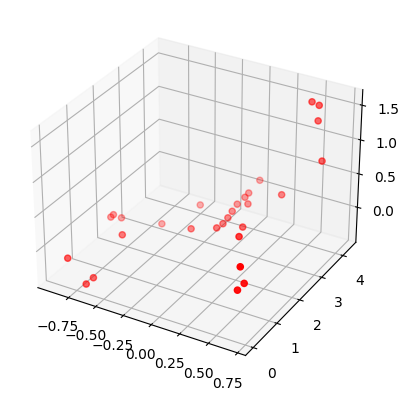

Print KeyPoints
[[-1.14185813e-03  2.36617097e+00  4.48055199e-03]
 [ 2.30509000e-01  2.37567862e+00  1.27595538e-01]
 [-2.32792082e-01  2.35666334e+00 -1.18634096e-01]
 [ 5.79785121e-03  2.60209706e+00 -4.14493944e-03]
 [ 4.18534858e-01  1.30522066e+00  4.22493449e-01]
 [-6.31287171e-01  1.30454708e+00 -6.91163411e-02]
 [ 3.36393489e-03  2.82558469e+00  1.28317716e-02]
 [ 6.76457887e-01  2.81248936e-01  2.20102972e-01]
 [-6.61453883e-01  2.79230794e-01 -3.91328936e-01]
 [-3.91461888e-03  3.04819544e+00  3.82374252e-02]
 [ 6.77773665e-01  9.18115238e-04  2.19182592e-01]
 [-6.60479900e-01 -1.10319105e-03 -3.90865741e-01]
 [-7.13522077e-03  3.62411504e+00  6.95028682e-02]
 [ 5.80640719e-02  3.44168054e+00  5.57890119e-02]
 [-4.02682450e-02  3.44387854e+00  5.17261909e-03]
 [-8.22513438e-03  3.79644333e+00  8.10825501e-02]
 [ 3.35729654e-01  3.56748420e+00  2.86846239e-01]
 [-3.84845003e-01  3.44748561e+00 -1.72270678e-01]
 [ 6.70709301e-01  3.62529726e+00  9.18847506e-01]
 [-6.01450890e-

In [62]:
import json
import pandas as pd
import numpy as np

# 获取映射关系
mapping = pd.read_csv("keys_mapping.csv")

key_joint_names = []

for row in mapping.index:
    key_joint_names.append(mapping.loc[row]['fbx_name'])

# print(key_joint_names)



data_path = './TestData/'
file_name = 'a000_000030.json'

with open(data_path + file_name,'r',encoding = 'utf-8') as fp:
    data = json.load(fp)
 
    # print(data["file_basename"])

    # 取第一帧测试
    frame_data = data["frame_sequence"][0]
    # print(frame_data)


    # 获取关节点信息列表
    joints_data = GetJointsDataFromFrameData(frame_data, key_joint_names)
    # print(joints_data)


    # 关键词排序
    joints_data_inorder = []
    
    for key_joint in key_joint_names:
        joint = GetValueInListByIndex("joint_name",key_joint,joints_data)
        if joint == None:
            continue
        joints_data_inorder.append(joint)


    # 获取匹配np格式keypoints列表
    keypoints = GetKeyPointsByJointsDataInorder(joints_data_inorder)


    print("Plot Scatter")
    Polt3D(keypoints)
    print("Print KeyPoints")
    print(keypoints)

    print("Begin Estimate")
    EstSMPLByKeypointAndScale(keypoints,2)

    




(110, 3)


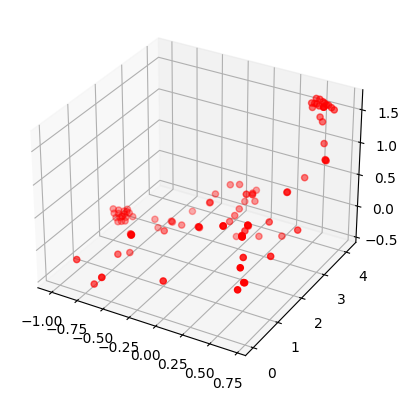

In [63]:
# 帧内数据打印测试

import numpy as np  # 用来处理数据


data_path = './TestData/'
file_name = 'a000_000030.json'

with open(data_path + file_name,'r',encoding = 'utf-8') as fp:
    data = json.load(fp)
 
    joints_data = data["frame_sequence"][0]["joint_position"]
    joints_np = np.zeros((len(joints_data), 3))

    cnt = 0
    for joint in joints_data:
        joints_np[cnt] = np.array((joint["position_x"], joint["position_y"], joint["position_z"]))
        cnt += 1

print(joints_np.shape)

Polt3D(joints_np)
 


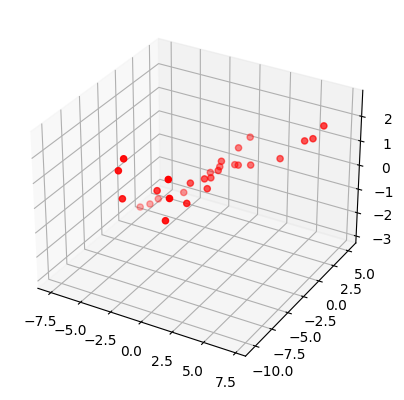

In [64]:
# 测试标准分布

from armatures import *
from models import *
import numpy as np
import config


np.random.seed(20160923)
pose_glb = np.zeros([1, 3]) 


n_pose = 23 * 3 
n_shape = 10
pose_pca = np.random.uniform(-0.2, 0.2, size=n_pose)
shape = np.random.normal(size=n_shape)
mesh = KinematicModel(config.SMPL_MODEL_PATH, SMPLArmature, scale=10)


_, keypoints = \
  mesh.set_params(pose_pca=pose_pca, pose_glb=pose_glb, shape=shape)

Polt3D(keypoints)


